In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
energy_train = pd.read_parquet('Data/energy_train.parquet')
energy_test2 = pd.read_parquet('Data/energy_test2.parquet')
energy_test1 = pd.read_parquet('Data/energy_test1.parquet')
forecasts = pd.read_parquet('Data/forecasts.parquet')

In [3]:
energy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   dtm                 19968 non-null  datetime64[ns, UTC]
 1   ref_datetime        19968 non-null  datetime64[ns, UTC]
 2   Solar_capacity_mwp  19968 non-null  float64            
 3   Solar_MWh           19964 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(2)
memory usage: 624.1 KB


In [4]:
energy_train.nunique()

dtm                   19968
ref_datetime           3328
Solar_capacity_mwp     2236
Solar_MWh             10621
dtype: int64

In [5]:
energy_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 9334
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   dtm                 7465 non-null   datetime64[ns, UTC]
 1   ref_datetime        7465 non-null   datetime64[ns, UTC]
 2   Solar_capacity_mwp  7465 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 233.3 KB


In [6]:
energy_test2.nunique()

dtm                   7465
ref_datetime          1208
Solar_capacity_mwp    2949
dtype: int64

In [7]:
energy_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 0 to 7272
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   dtm                 7245 non-null   datetime64[ns, UTC]
 1   ref_datetime        7245 non-null   datetime64[ns, UTC]
 2   Solar_capacity_mwp  7245 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 226.4 KB


In [8]:
energy_test1.nunique()

dtm                   7245
ref_datetime          1213
Solar_capacity_mwp     519
dtype: int64

## Aufgabe 1

### Aufgabe 1.1

Bei Trainingsdaten gibt es insgesamt 19968 Datenpunkte.        
Auf dem Test 1 gibt es: 7245 Datenpunkte und,      
Auf dem Test 2 gibt es: 7465 Datenpunkte.       
Insgesamt gibt es 14710 Datenpunkte auf den Testdaten.  

### Aufgabe 1.2

In [9]:
tage = ['2020-11-11', '2021-07-21'] # Beispieltage 
tage_data = energy_train[energy_train['dtm'].dt.strftime('%Y-%m-%d').isin(tage)].copy()  #auf Tage filtern
tage_data.loc[:,'hour'] = tage_data['dtm'].dt.hour #Stunden extrahieren
tage_data.loc[:,'month'] = tage_data['dtm'].dt.month 

#### Tagesverlauf der Stromerzeugung

In [10]:
# Visualisierung
fig = px.line(tage_data, x='hour', y='Solar_MWh', 
    color=tage_data['dtm'].dt.strftime('%Y-%m-%d'), 
    markers=True,
    labels={'hour': 'Uhrzeit', 'Solar_MWh': 'Erzeugte Menge an Solarstrom in MWh'},
    title="Tagesverlauf der Stromerzeugung für den 11.11.2020 und den 21.07.2021"
)
fig.show()

Die rote Kurve stellt die Stromerzeugung in MWh von dem 21.07.2021 dar, während die blaue Kurve die Stromerzeugung in MWH vom 11.11.2020 zeigt. 

Dabei handelt es sich um einen Sommertag (Juli) und um einen Wintertag (Dezember). Es ist deutlich zu erkennen, dass an dem Sommertag die Sonne bereits um kurz vor 4:00 Uhr aufgeht, was zur frühren Erzeugung an Solarstrom führt. Solarstrom wird auch fast bis 20:00 Uhr erzeugt. Die maximal Erzeugte Menge an Solarstrom wurde um 11:00 Uhr erreicht. 

Im Winter wurde hingegen erst ab etwa 7:00 Uhr Solartrom erzeugt und die höchste Menge an Solarstrom wurde um 12:00 Uhr erreicht. Danach sank die Kurve an erzeugter Menge an Solarstrom im MWh sehr schnell ab und es konnte nur bis kurz vor 16:00 Uhr Solarstrom erzeugt werden, da es danach höchstwahrscheinlich bereits dunkel war.

### Aufgabe 1.3

 #### Gesamtverlauf der Stromerzeugung

In [11]:
fig = px.line(energy_train, x= 'dtm', y='Solar_MWh', 
              labels= {'dtm': 'Datum', 'Solar_MWh': 'Erzeugte Menge an Solarstrom in MWh'},
              title= 'Visualisierung des Gesamtverlaufes der Stromerzeugung (Trainingsdaten)')
fig.show()

In [12]:
#Daten nach Monaten gruppieren und die Summe der Stromerzeugung berechnen
df_monthly = energy_train.groupby(energy_train['dtm'].dt.to_period('M'))['Solar_MWh'].sum().reset_index()
# Monatsperioden in Zeitstempel umwandeln, um sie für die Visualisierung zu nutzen
df_monthly['dtm'] = df_monthly['dtm'].dt.to_timestamp() 

# Visualisierung des Gesamtverlaufes der Stromerzeugung nach Monaten
fig = px.line(
    df_monthly,
    x='dtm',
    y='Solar_MWh',
    title='Visualisierung des Gesamtverlaufes der Stromerzeugung (Trainingsdaten)',
    labels={'dtm': 'Datum', 'Solar_MWh': 'Erzeugte Menge an Solarstrom in MWh'},
    markers=True
)

fig.show()

C:\Users\etzko\AppData\Local\Temp\ipykernel_34656\310421940.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Die Kurve stellt den Verlauf der monatlichen Solarstromerzeugung in MWh über einen Zeitraum von zwei Jahren dar.

Es lässt sich ein deutlich saisonales Muster erkennen, das durch die jahreszeitlichen Schwankungen der Sonneneinstrahlung geprägt ist.

Im Sommer, insbesondere in den Monaten Juni und Juli, sind die Tage länger und die Sonne scheint intensiver. Dies führt dazu, dass die Solaranlagen mehr Strom erzeugen können. Die höchsten Werte der Stromerzeugung wurden in diesen Monaten erreicht, da die Sonne früher aufgeht, später untergeht und die Sonneneinstrahlung intensiver ist.

Im Winter hingegen, insbesondere in den Monaten Dezember und Januar, sind die Tage kürzer, und die Sonneneinstrahlung ist schwächer. Die Solarstromerzeugung beginnt später am Tag, erreicht geringere Höchstwerte und endet früher. Das zeigt sich in den deutlich geringeren Werten der Stromerzeugung in den Wintermonaten.

## Aufgabe 2

### Aufgabe 2.1

#### Wettermodelle zusammenführen

Zuerst auf Spaltennamen filtern und umbenennen auf das jeweilige Wettermodell, welches uns die weitere Verarbeitung vereinfacht 

In [13]:
for model in ['DWD ICON', 'NCEP GFS']:
    # Filter für das Wettermodell
    forecasts_model = forecasts[forecasts['Weather Model'] == model].copy()
    
    # Spalten umbenennen
    forecasts_model = forecasts_model.rename(columns={
        'SolarDownwardRadiation': f'SolarDownwardRadiation_{model.replace(" ", "_")}',
        'CloudCover': f'CloudCover_{model.replace(" ", "_")}',
        'Temperature': f'Temperature_{model.replace(" ", "_")}'
    })
    
    # 'valid_datetime' berechnen
    forecasts_model['valid_datetime'] = pd.to_datetime(forecasts_model['ref_datetime']) + pd.to_timedelta(forecasts_model['valid_time'], unit='h')
    # muss so berechnet werden, da die Spalte ref_datetime den Zeitpunkt, an der die Wettervorhersage veröffentlicht wurde ist. valid_time gibt an, 
    # für wie viele Stunden die Wettervorhersage gültig war 
    # tatsächliche Gültigkeitsdauer: ref_datetime + timedelta(hours = valid_time)
    # -> timedata, um Zeitspannen zu erzeugen , unit = 'h', da wir in Stunden rechnen

    # Speicherung der Daten für die einzelnen Modelle
    if model == 'DWD ICON':
        forecasts_dwd = forecasts_model
    else:
        forecasts_ncep = forecasts_model

# Zusammenführen der beiden Modelle
forecasts_combined = pd.merge(forecasts_ncep, forecasts_dwd, on=['ref_datetime', 'valid_time', 'valid_datetime'], how='inner')

#### Energiedaten und Wettervorhersagen zusammenführen

um alle wichtige Informationen in einem Df zu haben und um weitere Vorverarbeitungsschritte durchzuführen (auch für Aufgabe 3 relevant)

In [14]:
energy_train_mit_forecast = pd.merge(energy_train, forecasts_combined, left_on=['dtm', 'ref_datetime'], right_on=['valid_datetime', 'ref_datetime'], how='inner')
energy_train_mit_forecast

dtm              ref_datetime  Solar_capacity_mwp  \
0     2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1     2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2     2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3     2020-09-21 03:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4     2020-09-21 04:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
...                         ...                       ...                 ...   
19591 2022-12-31 19:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
19592 2022-12-31 20:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
19593 2022-12-31 21:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
19594 2022-12-31 22:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
19595 2022-12-31 23:00:00+00:00 2022-12-30 18:00:00+00:00         2237.476835   

       Solar_MWh  valid_time  SolarDownwardRadiation_NCEP_GFS  \
0            0.0          24                              0.0   
1            0.0          25                              0.0   
2            0.0          26                              0.0   
3            0.0          27                              0.0   
4            0.0          28                              0.0   
...          ...         ...                              ...   
19591        0.0          25                              0.0   
19592        0.0          26                              0.0   
19593        0.0          27                              0.0   
19594        0.0          28                              0.0   
19595        0.0          29                              0.0   

       CloudCover_NCEP_GFS  Temperature_NCEP_GFS Weather Model_x  \
0                    0.002             12.240011        NCEP GFS   
1                    0.003             12.032483        NCEP GFS   
2                    0.007             11.833379        NCEP GFS   
3                    0.003             11.651335        NCEP GFS   
4                    0.003             11.484987        NCEP GFS   
...                    ...                   ...             ...   
19591                1.000             12.096367        NCEP GFS   
19592                1.000             12.321498        NCEP GFS   
19593                1.000             12.386409        NCEP GFS   
19594                1.000             12.532788        NCEP GFS   
19595                1.000             12.463732        NCEP GFS   

                 valid_datetime  SolarDownwardRadiation_DWD_ICON  \
0     2020-09-21 00:00:00+00:00                        -0.008356   
1     2020-09-21 01:00:00+00:00                         0.008838   
2     2020-09-21 02:00:00+00:00                         0.015384   
3     2020-09-21 03:00:00+00:00                        -0.008835   
4     2020-09-21 04:00:00+00:00                        -0.002165   
...                         ...                              ...   
19591 2022-12-31 19:00:00+00:00                         0.007227   
19592 2022-12-31 20:00:00+00:00                        -0.007031   
19593 2022-12-31 21:00:00+00:00                         0.000000   
19594 2022-12-31 22:00:00+00:00                        -0.006250   
19595 2022-12-31 23:00:00+00:00                         0.002148   

       CloudCover_DWD_ICON  Temperature_DWD_ICON Weather Model_y  
0                 0.327759             12.216522        DWD ICON  
1                 0.436067             12.015985        DWD ICON  
2                 0.468752             11.813635        DWD ICON  
3                 0.501229             11.651337        DWD ICON  
4                 0.514093             11.516748        DWD ICON  
...                    ...                   ...             ...  
19591             1.000000             12.368402        DWD ICON  
19592             0.999310             12.156036        DWD ICON  
19593             0.997759           

In [15]:
energy_train_mit_forecast['Monat'] = energy_train_mit_forecast['dtm'].dt.strftime('%b')  # Monaten extrahieren
energy_train_mit_forecast['Zeit'] = energy_train_mit_forecast['dtm'].dt.hour #Stunden extrahieren

features = ['Monat', 'SolarDownwardRadiation_NCEP_GFS', 'CloudCover_NCEP_GFS', 'Temperature_NCEP_GFS', 'Zeit'] #Attributen der Wettervorhersage
energy_train_mit_forecast['Zeit'] = energy_train_mit_forecast['Zeit'].astype(str)

#### Welche Attribute haben einen Zusammenhang mit der Stromerzeugung? (Scatterplot)

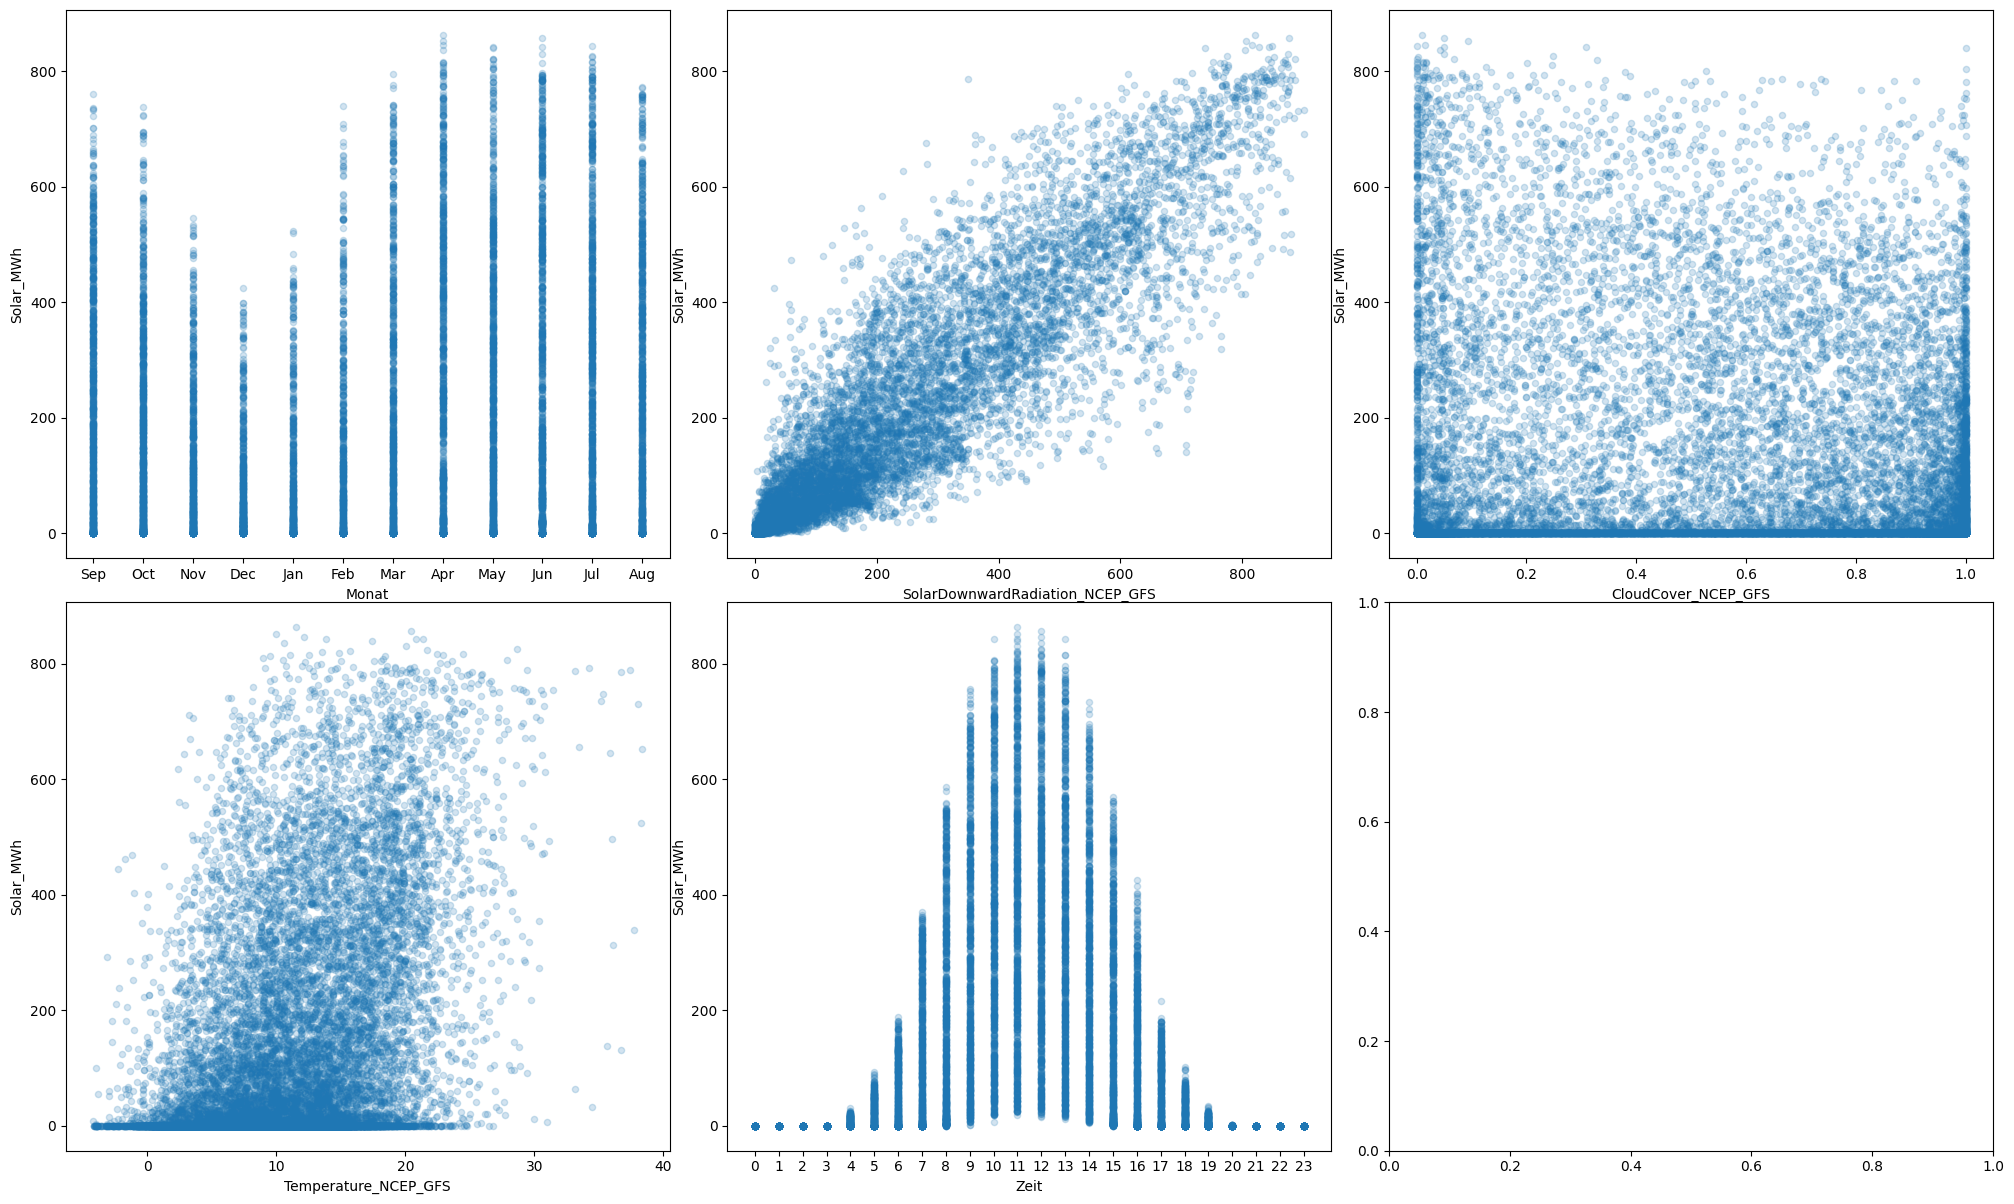

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
fig.tight_layout()

for i, col in enumerate(features):
    #plt.subplot(4, 3, i+1)
    energy_train_mit_forecast[["Solar_MWh",col]].plot.scatter(x=col, y="Solar_MWh", ax=axes[i//3,i%3], alpha=0.2)

#### Solar_MWh vs. SolarDownwardRadiation
Ein sehr starker linearer Zusammenhang ist zu erkennen: Mit zunehmender Sonneneinstrahlung steigt die Solarstromproduktion stark an.

#### Solar_MWh vs. Temperature:
Höhere Temperaturen fördern zwar die Stromproduktion, aber der Effekt ist nicht so stark wie bei der Sonneneinstrahlung. Dies könnte auf eine indirekte Beziehung hindeuten, z. B. dass wärmere Tage auch sonniger sind.

#### Solar_MWh vs. Zeit:

- Die Solarstromproduktion zeigt einen starken Zusammenhang mit der Tageszeit.
- Der Plot verdeutlicht, dass der Strom hauptsächlich zwischen den Stunden 6:00 und 17:00 erzeugt wird, mit einem deutlichen Spitzenwert zwischen 10:00 und 13:00. Dies entspricht dem Sonnenhöchststand, bei dem die Sonneneinstrahlung am intensivsten ist.
- Außerhalb dieser Stunden ist die Stromproduktion nahezu null, was den erwarteten Zusammenhang mit der Verfügbarkeit von Sonnenlicht bestätigt.

#### Solar_MWh vs. Monat:

Es gibt eine klare saisonale Variation:
- Die Solarstromproduktion ist in den Sommermonaten (April bis August) am höchsten. Dies ist auf die längeren Tagesstunden und intensivere Sonneneinstrahlung in diesen Monaten zurückzuführen.
- In den Wintermonaten (Oktober bis Februar) ist die Produktion deutlich niedriger, was durch kürzere Tage, tiefere Sonnenstände und häufigere Bewölkung erklärt werden kann.

#### Solar_MWh vs. CloudCover
Kein klarer Zusammenhang zwischen Bewölkungsanteil (CloudCover) und Solarstromproduktion ist zu erkennen.

#### Korrelationsmatrix der Wetterattribute und Solarstrom

In [17]:
corr_matrix = energy_train_mit_forecast[['SolarDownwardRadiation_NCEP_GFS', 'CloudCover_NCEP_GFS', 'Temperature_NCEP_GFS', 
                                         'SolarDownwardRadiation_DWD_ICON', 'CloudCover_DWD_ICON', 'Temperature_DWD_ICON',
                                         'Solar_MWh']].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    labels={'color': 'Korrelationskoeffizient'},
    title='Korrelationsmatrix der Wetterattribute und Solarstrom'
)
fig.show()

### Aufgabe 2.2

1) Sonneneinstrahlung (SolarDownwardRadiation)
- Die Daten zeigen, dass Solar_MWh (erzeugte Strommenge) sehr stark von der Sonneneinstrahlung abhängt.
Korrelation: Sehr starke Korrelation (ca. 0.93). Dies ist die höchste beobachtete Korrelation, was bedeutet, dass je mehr Sonneneinstrahlung vorhanden ist, desto mehr Strom wird produziert.


 ## Aufgabe 3

In [18]:
print('Spaltennamen im Df:', forecasts.columns)
print('Spaltennamen im Df:', energy_train.columns)

Spaltennamen im Df: Index(['ref_datetime', 'valid_time', 'SolarDownwardRadiation', 'CloudCover',
       'Temperature', 'Weather Model'],
      dtype='object')
Spaltennamen im Df: Index(['dtm', 'ref_datetime', 'Solar_capacity_mwp', 'Solar_MWh'], dtype='object')


In [19]:
# Merging mit energy_train
energy_train['dtm'] = pd.to_datetime(energy_train['dtm'])
energy_train['ref_datetime'] = pd.to_datetime(energy_train['ref_datetime'])
energy_train_mit_forecast = pd.merge(energy_train, forecasts_combined, left_on=['dtm', 'ref_datetime'], right_on=['valid_datetime', 'ref_datetime'], how='inner')

Entfernen von Datensätzen ohne Label -> Da Datensätze ohne Label (Solar_MWh) können nicht für das Training verwendet werden, denn sie enthalten keine Informationen über das Ziel, das vorhergesagt werden soll + damit nachher keine unterschiedliche Verteilung vorhanden ist

In [20]:
energy_train_mit_forecast = energy_train_mit_forecast[energy_train_mit_forecast['Solar_MWh'].isna()== False]

### Erstellen von Trainings- und Testdaten

Man muss jetzt in Trainings- und Testdaten aufteilen, um Dataleaks bei den kommenden Vorverarbeitungsschritten zu vermeiden

In [21]:
#Extrahieren von Monat und Jahr, bevor gefiltert wird, um eine zeitliche Struktur der Daten zu behalten 
energy_train_mit_forecast['month_year'] = energy_train_mit_forecast['dtm'].dt.to_period('M')

# Daten in Test- und Traingsdaten aufteilen, achtung auf Data leakage
df_train = energy_train_mit_forecast[(energy_train_mit_forecast['month_year'] >= '2020-09') & (energy_train_mit_forecast['month_year'] <= '2022-06')]
df_test = energy_train_mit_forecast[energy_train_mit_forecast['month_year'] > '2022-06']

C:\Users\etzko\AppData\Local\Temp\ipykernel_34656\3462500764.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



### Datenanalyse von den Daten (zuerst kathegorischen, dann numerischen)

In [22]:
numeric_columns = df_train.select_dtypes(include=np.number).columns
categorical_columns = df_train.select_dtypes(exclude=np.number).columns

df_train[categorical_columns].describe()

dtm  \
count                                 15504   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean    2021-08-11 15:11:39.380805120+00:00   
min               2020-09-21 00:00:00+00:00   
25%               2021-03-02 23:45:00+00:00   
50%               2021-08-11 17:30:00+00:00   
75%               2022-01-20 11:15:00+00:00   
max               2022-06-30 23:00:00+00:00   

                               ref_datetime Weather Model_x  \
count                                 15504           15504   
unique                                  NaN               1   
top                                     NaN        NCEP GFS   
freq                                    NaN           15504   
mean    2021-08-10 12:41:39.380804864+00:00             NaN   
min               2020-09-20 00:00:00+00:00             NaN   
25%               2021-03-01 22:30:00+00:00             NaN   
50%               2021-08-10 15:00:00+00:00             NaN   
75%               2022-01-19 07:30:00+00:00             NaN   
max               2022-06-29 18:00:00+00:00             NaN   

                             valid_datetime Weather Model_y month_year  
count                                 15504           15504      15504  
unique                                  NaN               1         22  
top                                     NaN        DWD ICON    2021-08  
freq                                    NaN           15504        744  
mean    2021-08-11 15:11:39.380805120+00:00             NaN        NaN  
min               2020-09-21 00:00:00+00:00             NaN        NaN  
25%               2021-03-02 23:45:00+00:00             NaN        NaN  
50%               2021-08-11 17:30:00+00:00             NaN        NaN  
75%               2022-01-20 11:15:00+00:00             NaN        NaN  
max               2022-06-30 23:00:00+00:00             NaN        NaN

In [23]:
drop_columns = {'dtm', 'ref_datetime','valid_time', 'valid_datetime', 'month', 'year', 'Weather Model_x', 'Weather Model_y'}
df_train = df_train.drop(drop_columns, axis=1, errors='ignore')
df_test = df_test.drop(drop_columns, axis=1, errors='ignore')

In [24]:
df_train.describe(exclude=np.number)

month_year
count       15504
unique         22
top       2021-08
freq          744

In [25]:
interesting_columns = ['Solar_capacity_mwp', 'Solar_MWh', 'SolarDownwardRadiation_DWD_ICON', 'CloudCover_DWD_ICON',	'Temperature_DWD_ICON',	'SolarDownwardRadiation_NCEP_GFS',	'CloudCover_NCEP_GFS',	'Temperature_NCEP_GFS']

### Untersuchung von Ausreißern

Untersuchung von Ausreißern, da sie  das Modell negativ beeinflussen können (vor allem wenn man ein lineares Modell trainiert) 
-> so bleibt die Modellleistung stabiler und generalisierbarer

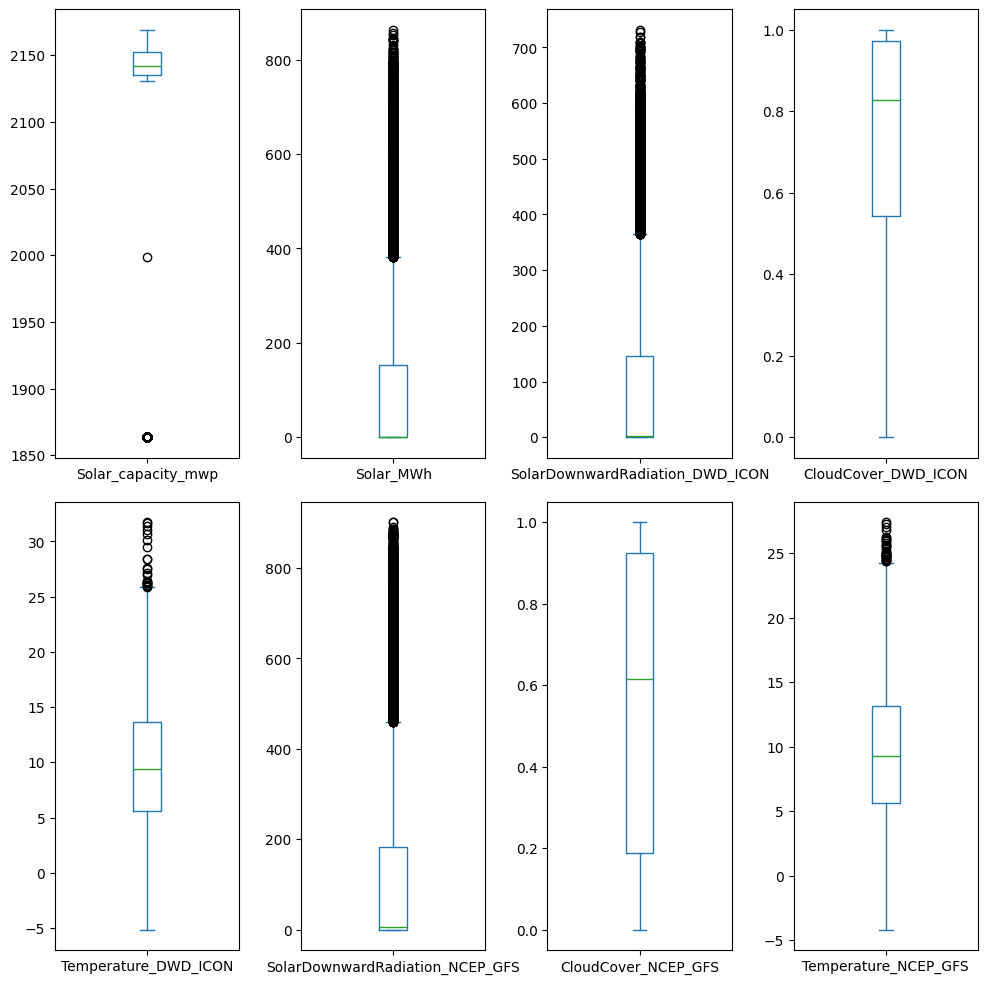

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
fig.tight_layout()

for i, col in enumerate(interesting_columns):
    plt.subplot(2, 4, i+1)
    df_train[col].plot(kind="box")

### Datenbereiningung

Entfernen von Ausreißern (kleiner als 0.5% Quantil und größer als 99.5% Quantil Punkte entfernen )

In [27]:
display(df_train[interesting_columns].quantile(0.995))
display(df_train[interesting_columns].quantile(0.005))

Solar_capacity_mwp                 2168.926220
Solar_MWh                           769.944639
SolarDownwardRadiation_DWD_ICON     631.487833
CloudCover_DWD_ICON                   1.000000
Temperature_DWD_ICON                 24.225415
SolarDownwardRadiation_NCEP_GFS     828.776818
CloudCover_NCEP_GFS                   1.000000
Temperature_NCEP_GFS                 23.145783
Name: 0.995, dtype: float64

Solar_capacity_mwp                 1863.515101
Solar_MWh                             0.000000
SolarDownwardRadiation_DWD_ICON      -0.031626
CloudCover_DWD_ICON                   0.000000
Temperature_DWD_ICON                 -2.231957
SolarDownwardRadiation_NCEP_GFS       0.000000
CloudCover_NCEP_GFS                   0.000000
Temperature_NCEP_GFS                 -2.396934
Name: 0.005, dtype: float64

In [28]:
upper_limits = df_train[interesting_columns].quantile(0.995)
lower_limits = df_train[interesting_columns].quantile(0.005)

In [29]:
df_train_reduced = df_train.copy()
df_test_reduced = df_test.copy()

In [30]:
# Für jede Spalte behalten wir: Daten die < (99.5%-Quantil) sind und > (0.5%-Quantil) sind ODER die NaN sind 
for col in interesting_columns:
    df_train_reduced = df_train_reduced[((df_train_reduced[col] <= upper_limits[col]) & (df_train_reduced[col] >= lower_limits[col])) | df_train_reduced[col].isna()]
    df_test_reduced = df_test_reduced[((df_test_reduced[col] <= upper_limits[col]) & (df_test_reduced[col] >= lower_limits[col])) | df_test_reduced[col].isna()]

df_train_reduced.describe(include=np.number)

Solar_capacity_mwp     Solar_MWh  SolarDownwardRadiation_NCEP_GFS  \
count        14961.000000  14961.000000                     14895.000000   
mean          2128.680156    102.384361                       117.714581   
std             67.590608    169.906722                       188.424226   
min           1863.515101      0.000000                         0.000000   
25%           2135.492738      0.000000                         0.000000   
50%           2141.807783      0.198232                         3.872000   
75%           2151.883330    143.030307                       174.252299   
max           2168.926220    768.044095                       828.754001   

       CloudCover_NCEP_GFS  Temperature_NCEP_GFS  \
count         14948.000000          14954.000000   
mean              0.562972              9.477428   
std               0.364427              5.010163   
min               0.000000             -2.392622   
25%               0.196175              5.695406   
50%               0.627575              9.236998   
75%               0.929000             13.018656   
max               1.000000             23.079790   

       SolarDownwardRadiation_DWD_ICON  CloudCover_DWD_ICON  \
count                     14914.000000         14949.000000   
mean                         90.560809             0.727450   
std                         141.138053             0.288053   
min                          -0.031433             0.000000   
25%                           0.000977             0.554129   
50%                           1.348048             0.833761   
75%                         137.571582             0.973424   
max                         628.657166             1.000000   

       Temperature_DWD_ICON  
count          14949.000000  
mean               9.617347  
std                5.367675  
min               -2.185535  
25%                5.607153  
50%                9.386365  
75%               13.554047  
max               24.195484

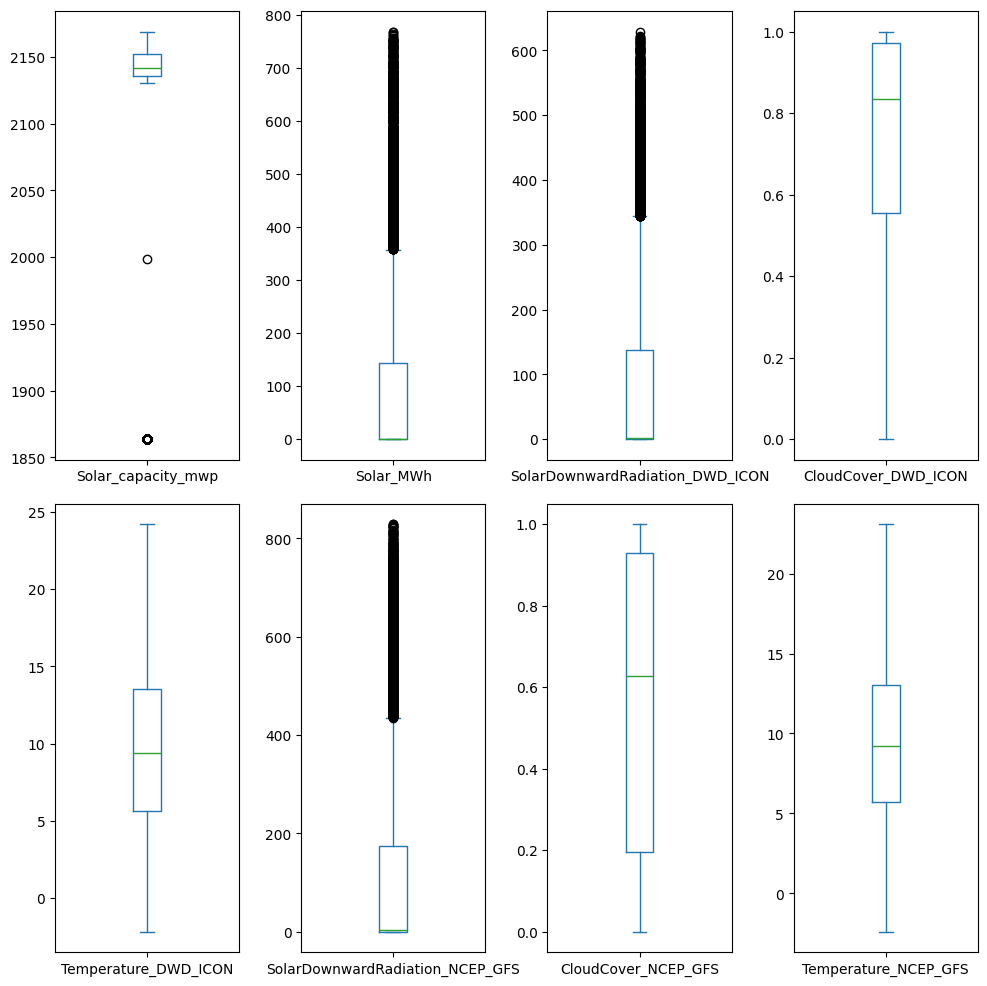

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
fig.tight_layout()

for i, col in enumerate(interesting_columns):
    plt.subplot(2, 4, i+1)
    df_train_reduced[col].plot(kind="box")

### Behandlung von fehlenden Datensätzen

In [32]:
df_train_reduced.isna().sum() # isna() wandelt jeden Wert in einen Boolschen Datentyp (0/1) um. sum() summiert diese Werte pro Spalte. Man erhält also die Anzahl der NaN Werte pro Spalte.
# SOlarDownwardRadiation hat viele Na Werte

Solar_capacity_mwp                  0
Solar_MWh                           0
SolarDownwardRadiation_NCEP_GFS    66
CloudCover_NCEP_GFS                13
Temperature_NCEP_GFS                7
SolarDownwardRadiation_DWD_ICON    47
CloudCover_DWD_ICON                12
Temperature_DWD_ICON               12
month_year                          0
dtype: int64

Damit nicht viele Zeilen aufgrund von NaN-Werten verloren geht, benutzt man SimpleImputer um sicher zu stellen, dass die Daten vollständig sind und trotzdem möglichst wenig Informationsverlust entsteht. Mittelwert verwenden man für numerische Werte, den häufigsten Wert benutzt man für kategorische Daten.

In [33]:
categorical_columns = df_train_reduced.select_dtypes(exclude=np.number).columns
numeric_columns = df_train_reduced.select_dtypes(include=np.number).columns
# Für die Label-artigen Columns ersetzen wir die fehlenden Werte nicht
numeric_columns = numeric_columns.drop("Solar_MWh") 

In [34]:
from sklearn.impute import SimpleImputer

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df_train_reduced.loc[:,categorical_columns] = imp_freq.fit_transform(df_train_reduced[categorical_columns])
df_train_reduced.loc[:,numeric_columns] = imp_mean.fit_transform(df_train_reduced[numeric_columns])

df_test_reduced.loc[:,categorical_columns] = imp_freq.transform(df_test_reduced[categorical_columns])
df_test_reduced.loc[:,numeric_columns] = imp_mean.transform(df_test_reduced[numeric_columns])

### Feature Engineering

Das Label (Solar_MWh) wird aus den Features entfernt, da es nicht als Eingabe fürs Training genutzt werden darf. Es bleibt separat in y_train und y_test.

In [35]:
df_train = df_train.drop("Solar_MWh", axis=1, errors="ignore")

In [36]:
# Die Label-Spalte speichern wir in der Variable y_train bzw. y_test
y_train = df_train_reduced["Solar_MWh"]
y_test = df_test_reduced["Solar_MWh"]

# Nun werden die Spalten endgültig entfernt
df_train_reduced = df_train_reduced.drop(["Solar_MWh", "dtm"], axis=1, errors="ignore")
df_test_reduced = df_test_reduced.drop(["Solar_MWh", "dtm"], axis=1, errors="ignore")

### OneHotEncoding

Kategoriale Variablen müssen in numerische Werte umgewandelt werden. Benutzen dazu OneHotEncoding, da es die Reihenfolge vermeidet

In [37]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="if_binary")

categorical_columns = df_train_reduced.select_dtypes(exclude=np.number).columns

one_hot_columns_train = pd.DataFrame(enc.fit_transform(df_train_reduced[categorical_columns]))
one_hot_columns_train.columns = enc.get_feature_names_out()
one_hot_columns_train.index = df_train_reduced.index

one_hot_columns_test = pd.DataFrame(enc.transform(df_test_reduced[categorical_columns]))
one_hot_columns_test.columns = enc.get_feature_names_out()
one_hot_columns_test.index = df_test_reduced.index

c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros



Zusammenfügen der finalen Trainings- und Testdaten, um endgültige Datensätze (X_train und X_test) für das Training und die Validierung zu haben

In [38]:
numeric_columns = df_train_reduced.select_dtypes(include=np.number).columns

X_train = pd.concat([df_train_reduced[numeric_columns], one_hot_columns_train], axis=1)
X_test = pd.concat([df_test_reduced[numeric_columns], one_hot_columns_test], axis=1)

In [39]:
X_train 

Solar_capacity_mwp  SolarDownwardRadiation_NCEP_GFS  \
0             2130.510089                         0.000000   
1             2130.510089                         0.000000   
2             2130.510089                         0.000000   
3             2130.510089                         0.000000   
4             2130.510089                         0.000000   
...                   ...                              ...   
15499         2167.528687                        37.235000   
15500         2167.528687                         1.212000   
15501         2167.528687                         0.016001   
15502         2167.528687                         0.020000   
15503         2167.528598                         0.008400   

       CloudCover_NCEP_GFS  Temperature_NCEP_GFS  \
0                  0.00200             12.240011   
1                  0.00300             12.032483   
2                  0.00700             11.833379   
3                  0.00300             11.651335   
4                  0.00300             11.484987   
...                    ...                   ...   
15499              0.63950             15.225670   
15500              0.53165             13.900589   
15501              0.40950             12.739983   
15502              0.19580             11.881594   
15503              0.06750             11.165009   

       SolarDownwardRadiation_DWD_ICON  CloudCover_DWD_ICON  \
0                            -0.008356             0.327759   
1                             0.008838             0.436067   
2                             0.015384             0.468752   
3                            -0.008835             0.501229   
4                            -0.002165             0.514093   
...                                ...                  ...   
15499                        30.262616             0.845469   
15500                         1.121317             0.645718   
15501                         0.019339             0.457060   
15502                         0.004657             0.433571   
15503                         0.009943             0.237967   

       Temperature_DWD_ICON  month_year_2020-09  month_year_2020-10  \
0                 12.216522                 1.0                 0.0   
1                 12.015985                 1.0                 0.0   
2                 11.813635                 1.0                 0.0   
3                 11.651337                 1.0                 0.0   
4                 11.516748                 1.0                 0.0   
...                     ...                 ...                 ...   
15499             15.722223                 0.0                 0.0   
15500             14.745624                 0.0                 0.0   
15501             13.446466                 0.0                 0.0   
15502             12.653076                 0.0                 0.0   
15503             11.973669                 0.0                 0.0   

       month_year_2020-11  ...  month_year_2021-09  month_year_2021-10  \
0                     0.0  ...                 0.0                 0.0   
1                     0.0  ...                 0.0                 0.0   
2                     0.0  ...                 0.0                 0.0   
3                     0.0  ...                 0.0                 0.0   
4                     0.0  ...                 0.0                 0.0   
...                   ...  ...                 ...                 ...   
15499                 0.0  ...                 0.0                 0.0   
15500                 0.0  ...                 0.0                 0.0   
15501                 0.0  ...                 0.0                 0.0   
15502                 0.0  ...                 0.0                 0.0   
15503                 0.0  ...                 0.0                 0.0   

       month_year_2021-11  month_year_2021-12  month_year_2022-01  \
0                     0.0                 0.0                 0.0   


Warum wurde diese Reihenfolge gewählt?

Zuerst Datenbereinigung und Vorverarbeitung gemacht, um unvollständige oder inkonsistente Daten zu bereinigen. 
Danach Spaltenauswahl und Transformationen, um Datenkonsistenz zu behalten und Modellkompatibilität zu garantieren.
Anschließend wurde zur Vermeidung von Datenleaks, das Dataframe Energy_train_mit_forecast gesplitet.
Zum Schluss Feature Engineering und Encoding, zur Optimierung für maschinelle Lernalgorithmen.

## Aufgabe 4

Potentielle Reduktion der Solarstrahlung durch Bewölkung

In [40]:
energy_train_mit_forecast['CloudRadiationLoss'] =(energy_train_mit_forecast['SolarDownwardRadiation_DWD_ICON']* energy_train_mit_forecast['CloudCover_DWD_ICON'])

In [41]:
fig = px.scatter(energy_train_mit_forecast, x='CloudRadiationLoss', y='Solar_MWh', trendline='ols', title='Zusammenhang zwischen der potentiellen Reduktion der Solarstrahlung durch Bewölkung und der tatsächlichen Solarerzeugung', 
                 labels={'CloudRadiationLoss': 'potentielle Reduktion der Solarstrahlung', 'Solar_MWh': 'Erzeugte Strommenge in MWh'},opacity=0.6)
fig.show()

In [42]:
energy_train_mit_forecast['Relative_Reduktion'] = (
    energy_train_mit_forecast['CloudRadiationLoss'] / 
    energy_train_mit_forecast['SolarDownwardRadiation_DWD_ICON']
)

-> zeigt einen Zusammenhang zwischen potentiellen Reduktion der Solarstrahlung durch Bewölkung und der erzeugten Strommenge

-> Bewölkung hat einen negativen Einfluss auf die erzeugte Strommenge

In [43]:
fig = px.scatter(energy_train_mit_forecast, x='Relative_Reduktion', y='Solar_MWh', trendline='ols', title='', 
                 labels={'CloudRadiationLoss': 'potentielle Reduktion der Solarstrahlung', 'Solar_MWh': 'Erzeugte Strommenge in MWh'},opacity=0.6)
fig.show()

-> schwacher Zusammenhang und eine große Streuung -> es gibt andere Faktoren, die eine wichtigere Rolle bei der Stromerzeugung spielen

In [44]:
energy_train_mit_forecast['effective_radiation_DWD_ICON'] = energy_train_mit_forecast['SolarDownwardRadiation_DWD_ICON'] * (1 - energy_train_mit_forecast['CloudCover_DWD_ICON'])
energy_train_mit_forecast['effective_radiation_NCEP_GFS'] = energy_train_mit_forecast['SolarDownwardRadiation_NCEP_GFS'] * (1 - energy_train_mit_forecast['CloudCover_NCEP_GFS'])
energy_train_mit_forecast['radiation_temp_interaction_DWD_ICON'] = energy_train_mit_forecast['SolarDownwardRadiation_DWD_ICON'] * energy_train_mit_forecast['Temperature_DWD_ICON'] 
energy_train_mit_forecast['radiation_temp_interaction_NCEP_GFS'] = energy_train_mit_forecast['SolarDownwardRadiation_NCEP_GFS'] * energy_train_mit_forecast['Temperature_NCEP_GFS'] 
energy_train_mit_forecast['temperature_squared_DWD_ICON'] = energy_train_mit_forecast['Temperature_DWD_ICON'] ** 2  
energy_train_mit_forecast['temperature_squared_NCEP_GFS'] = energy_train_mit_forecast['Temperature_NCEP_GFS'] ** 2  
energy_train_mit_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19596 entries, 0 to 19595
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   dtm                                  19596 non-null  datetime64[ns, UTC]
 1   ref_datetime                         19596 non-null  datetime64[ns, UTC]
 2   Solar_capacity_mwp                   19596 non-null  float64            
 3   Solar_MWh                            19596 non-null  float64            
 4   valid_time                           19596 non-null  int64              
 5   SolarDownwardRadiation_NCEP_GFS      19530 non-null  float64            
 6   CloudCover_NCEP_GFS                  19580 non-null  float64            
 7   Temperature_NCEP_GFS                 19586 non-null  float64            
 8   Weather Model_x                      19596 non-null  object             
 9   valid_datetime              

In [45]:
energy_train_mit_forecast.head(2)

dtm              ref_datetime  Solar_capacity_mwp  \
0 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   

   Solar_MWh  valid_time  SolarDownwardRadiation_NCEP_GFS  \
0        0.0          24                              0.0   
1        0.0          25                              0.0   

   CloudCover_NCEP_GFS  Temperature_NCEP_GFS Weather Model_x  \
0                0.002             12.240011        NCEP GFS   
1                0.003             12.032483        NCEP GFS   

             valid_datetime  ...  Weather Model_y  month_year  \
0 2020-09-21 00:00:00+00:00  ...         DWD ICON     2020-09   
1 2020-09-21 01:00:00+00:00  ...         DWD ICON     2020-09   

   CloudRadiationLoss Relative_Reduktion effective_radiation_DWD_ICON  \
0           -0.002739           0.327759                    -0.005617   
1            0.003854           0.436067                     0.004984   

   effective_radiation_NCEP_GFS  radiation_temp_interaction_DWD_ICON  \
0                           0.0                            -0.102078   
1                           0.0                             0.106196   

   radiation_temp_interaction_NCEP_GFS  temperature_squared_DWD_ICON  \
0                                  0.0                    149.243415   
1                                  0.0                    144.383907   

   temperature_squared_NCEP_GFS  
0                    149.817875  
1                    144.780650  

[2 rows x 23 columns]

In [46]:
energy_train_mit_forecast.columns

Index(['dtm', 'ref_datetime', 'Solar_capacity_mwp', 'Solar_MWh', 'valid_time',
       'SolarDownwardRadiation_NCEP_GFS', 'CloudCover_NCEP_GFS',
       'Temperature_NCEP_GFS', 'Weather Model_x', 'valid_datetime',
       'SolarDownwardRadiation_DWD_ICON', 'CloudCover_DWD_ICON',
       'Temperature_DWD_ICON', 'Weather Model_y', 'month_year',
       'CloudRadiationLoss', 'Relative_Reduktion',
       'effective_radiation_DWD_ICON', 'effective_radiation_NCEP_GFS',
       'radiation_temp_interaction_DWD_ICON',
       'radiation_temp_interaction_NCEP_GFS', 'temperature_squared_DWD_ICON',
       'temperature_squared_NCEP_GFS'],
      dtype='object')

### Daten auf die Jahreszeiten aufteilen

In [47]:
energy_train_mit_forecast['month'] = energy_train_mit_forecast['month_year'].dt.month # verweden um Monatsnummer zu erhalten

In [48]:
# Funktion für die Jahreszeiten
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

In [49]:
# Jeweiligen Jahreszeiten Zuordnen

energy_train_mit_forecast['Season'] = energy_train_mit_forecast['month'].apply(get_season)

In [50]:
fig = px.box(
    energy_train_mit_forecast,
    x='Season',
    y='Solar_MWh',
    title='Solarstromerzeugung nach Jahreszeiten',
    labels={'Season': 'Jahreszeit', 'Solar_MWh': 'Erzeugte Solarstrommenge (MWh)'}
)
fig.show()

### Schauen wann die Sonne jeden Tag auf- und untergeht

In [51]:
# Extrahiere das Datum aus der `dtm`-Spalte
energy_train_mit_forecast['date'] = energy_train_mit_forecast['dtm'].dt.date

# Filtriere Zeilen mit Solar_MWh > 0
energy_positive = energy_train_mit_forecast[energy_train_mit_forecast['Solar_MWh'] > 0]

# Gruppiere nach `date` und finde den ersten Zeitpunkt pro Tag
first_positive_time = energy_positive.groupby('date')['dtm'].min().reset_index()

# Ergebnis anzeigen
# first_positive_time

In [52]:
# Umbenennen der dtm-Spalte in `first_positive_dtm` im first_positive_time DataFrame
first_positive_time = first_positive_time.rename(columns={'dtm': 'first_positive_dtm'})

# Mergen von first_positive_time mit energy_train_mit_forecast
energy_train_mit_forecast = pd.merge(energy_train_mit_forecast, first_positive_time, on='date', how='left', suffixes=('', '_from_first_positive_time'))

In [53]:
# Finde den letzten Zeitpunkt pro Tag, an dem Solar_MWh > 0 war
last_positive_time = energy_positive.groupby('date')['dtm'].max().reset_index()

# Funktion, um den ersten Zeitpunkt nach dem letzten positiven Wert zu finden, wo Solar_MWh == 0
def find_zero_after_last(df, last_times):
    results = []
    for _, row in last_times.iterrows():
        date = row['date']
        last_positive_dtm = row['dtm']
        # Filtriere Daten für das entsprechende Datum
        daily_data = df[df['date'] == date]
        # Finde den ersten Zeitpunkt nach dem letzten positiven Wert
        zero_after_last = daily_data[
            (daily_data['dtm'] > last_positive_dtm) & (daily_data['Solar_MWh'] == 0)
        ]
        if not zero_after_last.empty:
            results.append({'date': date, 'zero_after_last_dtm': zero_after_last.iloc[0]['dtm']})
        else:
            results.append({'date': date, 'zero_after_last_dtm': None})
    return pd.DataFrame(results)

# Finde Zeitpunkte für Solar_MWh == 0 nach dem letzten positiven Wert
zero_times = find_zero_after_last(energy_train_mit_forecast, last_positive_time)

# Ergebnis anzeigen
# print(zero_times)

In [54]:
# Mergen von zero_times mit energy_train_mit_forecast auf 'date' Spalte
energy_train_mit_forecast = pd.merge(energy_train_mit_forecast, zero_times, on='date', how='left', suffixes=('', '_zero_after_last_dtm'))

In [55]:
energy_train_mit_forecast.head()

dtm              ref_datetime  Solar_capacity_mwp  \
0 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2 2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3 2020-09-21 03:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4 2020-09-21 04:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   

   Solar_MWh  valid_time  SolarDownwardRadiation_NCEP_GFS  \
0        0.0          24                              0.0   
1        0.0          25                              0.0   
2        0.0          26                              0.0   
3        0.0          27                              0.0   
4        0.0          28                              0.0   

   CloudCover_NCEP_GFS  Temperature_NCEP_GFS Weather Model_x  \
0                0.002             12.240011        NCEP GFS   
1                0.003             12.032483        NCEP GFS   
2                0.007             11.833379        NCEP GFS   
3                0.003             11.651335        NCEP GFS   
4                0.003             11.484987        NCEP GFS   

             valid_datetime  ...  effective_radiation_NCEP_GFS  \
0 2020-09-21 00:00:00+00:00  ...                           0.0   
1 2020-09-21 01:00:00+00:00  ...                           0.0   
2 2020-09-21 02:00:00+00:00  ...                           0.0   
3 2020-09-21 03:00:00+00:00  ...                           0.0   
4 2020-09-21 04:00:00+00:00  ...                           0.0   

   radiation_temp_interaction_DWD_ICON  radiation_temp_interaction_NCEP_GFS  \
0                            -0.102078                                  0.0   
1                             0.106196                                  0.0   
2                             0.181740                                  0.0   
3                            -0.102938                                  0.0   
4                            -0.024936                                  0.0   

  temperature_squared_DWD_ICON temperature_squared_NCEP_GFS  month  Season  \
0                   149.243415                   149.817875      9  Autumn   
1                   144.383907                   144.780650      9  Autumn   
2                   139.561969                   140.028854      9  Autumn   
3                   135.753646                   135.753602      9  Autumn   
4                   132.635494                   131.904932      9  Autumn   

         date        first_positive_dtm       zero_after_last_dtm  
0  2020-09-21 2020-09-21 05:00:00+00:00 2020-09-21 18:00:00+00:00  
1  2020-09-21 2020-09-21 05:00:00+00:00 2020-09-21 18:00:00+00:00  
2  2020-09-21 2020-09-21 05:00:00+00:00 2020-09-21 18:00:00+00:00  
3  2020-09-21 2020-09-21 05:00:00+00:00 2020-09-21 18:00:00+00:00  
4  2020-09-21 2020-09-21 05:00:00+00:00 2020-09-21 18:00:00+00:00  

[5 rows x 28 columns]

### Herausfinden, wann die Sonne in den jeweiligen Jahreszeiten im durchschnitt auf- und untergeht

In [56]:
# Funktion, um die Zeit seit Mitternacht in Sekunden zu berechnen
def time_since_midnight(dt_series):
    return dt_series.dt.hour * 3600 + dt_series.dt.minute * 60 + dt_series.dt.second

# Berechne die Sekunden seit Mitternacht
energy_train_mit_forecast['first_positive_seconds'] = time_since_midnight(energy_train_mit_forecast['first_positive_dtm'])
energy_train_mit_forecast['zero_after_seconds'] = time_since_midnight(energy_train_mit_forecast['zero_after_last_dtm'])

# Gruppiere nach Season und berechne den Mittelwert der Sekunden
average_times_by_season = (
    energy_train_mit_forecast
    .groupby('Season')[['first_positive_seconds', 'zero_after_seconds']]
    .mean()
    .reset_index()
)

# Konvertiere die Sekunden zurück in ein Zeitformat
average_times_by_season['avg_first_positive_time'] = pd.to_timedelta(average_times_by_season['first_positive_seconds'], unit='s')
average_times_by_season['avg_zero_after_time'] = pd.to_timedelta(average_times_by_season['zero_after_seconds'], unit='s')

# Nur relevante Spalten anzeigen
average_times_by_season = average_times_by_season[['Season', 'avg_first_positive_time', 'avg_zero_after_time']]

# Ergebnis anzeigen
average_times_by_season


Season   avg_first_positive_time       avg_zero_after_time
0  Autumn 0 days 06:12:37.507660878 0 days 17:34:29.262295082
1  Spring 0 days 04:43:30.612244898 0 days 19:32:09.795918367
2  Summer 0 days 03:41:24.782608696 0 days 20:34:33.913043478
3  Winter 0 days 07:37:53.218673219 0 days 16:45:50.859950860

## Schauen welche Features am aussagekräftigsten ist

In [57]:
# Berechnung der Korrelationen
correlations = energy_train_mit_forecast.corr(numeric_only=True)['Solar_MWh'].sort_values(ascending=False)

# Ausgabe der stärksten Korrelationen
print("Korrelation mit Solar_MWh:")
print(correlations)

Korrelation mit Solar_MWh:
Solar_MWh                              1.000000
SolarDownwardRadiation_DWD_ICON        0.952156
SolarDownwardRadiation_NCEP_GFS        0.933041
radiation_temp_interaction_DWD_ICON    0.866000
radiation_temp_interaction_NCEP_GFS    0.853576
CloudRadiationLoss                     0.828186
effective_radiation_NCEP_GFS           0.779750
effective_radiation_DWD_ICON           0.724797
temperature_squared_NCEP_GFS           0.455443
temperature_squared_DWD_ICON           0.450845
Temperature_NCEP_GFS                   0.428452
Temperature_DWD_ICON                   0.417562
zero_after_seconds                     0.325217
Solar_capacity_mwp                     0.098282
valid_time                             0.006732
Relative_Reduktion                    -0.082235
CloudCover_DWD_ICON                   -0.082827
month                                 -0.096226
CloudCover_NCEP_GFS                   -0.124180
first_positive_seconds                -0.319180
Name: Solar_M

Fazit:

von den neu hinzugefüten Features kann man sehen, dass radiation_temp_interaction (auf beiden Wettervorhersagemodellen) den stärksten Einfluss auf Solar_MWh haben. -> Feature berücksichtigt die Effizienz von den Solaranlagen im Bezug zur Temperatur

effective_radiation (tatsächliche Menge an Strahlung, die die Solarpads erreicht, nach Abzug der durch Wolken verlorenen Strahlung) haben ebenfalls einen Einfluss auf Solar_MWh, jedoch nur einen mittleren Einfluss. Genauso wie CloudRadiationLoss , welches den Verlust an Strahlung durch Wolkenbedeckung repräsentiert.

temperature_squared und termperature je nach Wettermodell haben nur einen moderaten Einfluss auf Solar_MWh.

Es ist jedoch auffällig, dass das Feature SolarDownwardRadiation (die direkte Sonneneinstrahlung) den größten Einfluss hat. 